In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from matplotlib import font_manager as fm
from matplotlib.colors import ListedColormap

In [2]:
import cmcrameri.cm as cmc

In [3]:
# Manually specify the font path
font_path = "/usr/share/fonts/truetype/msttcorefonts/times.ttf"  # Update if necessary
times_new_roman = fm.FontProperties(fname=font_path)

# Set the font globally
rcParams['font.family'] = times_new_roman.get_name()

In [4]:
# # Load the large tensor from file (assumes it's saved in a format compatible with `torch.load`)
# file_path = "circ_crossformer/circ_data_tensors/Circ_test_data_np.npy"
# big_tensor = np.load(file_path)  # This loads the tensor into CPU memory

In [5]:
file_path_1605 = "circ_crossformer/circ_data_tensors/data_1605_best.npy"
big_tensor_1605 = np.load(file_path_1605)  # This loads the tensor into CPU memory

file_path_3737 = "circ_crossformer/circ_data_tensors/data_3737_best.npy"
big_tensor_3737 = np.load(file_path_3737)  # This loads the tensor into CPU memory

In [ ]:
# big_tensor_np = big_tensor.numpy()

In [ ]:
# np.save('circ_crossformer/circ_data_tensors/Circ_test_data_np.npy', big_tensor_np)

In [6]:
## load labels
label_path   = "circ_crossformer/circ_data_tensors/Circ_test_label.pt"
label_tensor = torch.load(label_path)  # This loads the tensor into CPU memory

In [7]:
## load mask
mask_path   = "circ_crossformer/circ_data_tensors/Circ_test_mask.pt"
mask_tensor = torch.load(mask_path)  # This loads the tensor into CPU memory

In [9]:
# valid_labels_indices = [1,18,56,57,80,86,129,131,158,175,185,217,236,240,264,280,288,341,345,352,374,377,417,425,443,459,465,470,484,490,524,544,551,579,607,617,635,674,679,682,692,705,729,734,741,765,780,800,805,821,823,832,834,866,871,881,885,894,904,916,934,961,977,1024,1060,1064,1068,1070,1071,1085,1103,1115,1117,1137,1144,1147,1169,1177,1190,1205,1235,1236,1242,1268,1270,1295,1299,1331,1336,1341,1372,1381,1382,1417,1421,1422,1433,1451,1457,1477,1497,1499,1524,1556,1561,1605,1610,1630,1639,1645,1655,1682,1692,1699,1700,1776,1789,1846,1858,1892,1900,1905,1909,1924,1948,1958,1963,1970,2002,2010,2014,2049,2050,2061,2092,2143,2155,2163,2185,2186,2197,2266,2277,2300,2322,2338,2377,2398,2425,2438,2458,2490,2495,2498,2508,2549,2550,2559,2564,2581,2590,2594,2635,2636,2659,2769,2786,2804,2851,2923,2928,2929,2949,2991,2999,3014,3034,3042,3043,3056,3062,3066,3070,3079,3115,3145,3154,3155,3167,3188,3196,3200,3234,3245,3274,3287,3294,3304,3315,3330,3347,3374,3392,3393,3397,3405,3436,3449,3468,3477,3478,3481,3488,3489,3501,3512,3514,3519,3537,3546,3547,3562,3571,3589,3609,3640,3672,3690,3728,3737,3751,3754,3767,3781,3832,3840,3864,3867,3876,3880,3904,3914,3923,3925,3949,3958,3966,3975,3989,3993,4001,4007,4008,4021,4027,4073,4074,4086,4097,4105,4120,4134,4151,4185,4193,4196,4210,4218,4291,4299,4316,4317,4328,4344,4345,4386,4407,4429,4432,4433,4448,4456,4458,4470,4508,4547,4550,4562,4587,4590,4603,4637,4651,4664,4673,4687,4708,4719,4729,4734,4739,4751,4780,4790,4793,4802,4811,4836,4838,4839,4841,4852,4871,4882,4974,4995,5015,5032,5043]

Valid sample IDs: [   1   18   56   57   80   86  129  131  158  175  185  217  236  240
  264  280  288  341  345  352  374  377  417  425  443  459  465  470
  484  490  524  544  551  579  607  617  635  674  679  682  692  705
  729  734  741  765  780  800  805  821  823  832  834  866  871  881
  885  894  904  916  934  961  977 1024 1060 1064 1068 1070 1071 1085
 1103 1115 1117 1137 1144 1147 1169 1177 1190 1205 1235 1236 1242 1268
 1270 1295 1299 1331 1336 1341 1372 1381 1382 1417 1421 1422 1433 1451
 1457 1477 1497 1499 1524 1556 1561 1605 1610 1630 1639 1645 1655 1682
 1692 1699 1700 1776 1789 1846 1858 1892 1900 1905 1909 1924 1948 1958
 1963 1970 2002 2010 2014 2049 2050 2061 2092 2143 2155 2163 2185 2186
 2197 2266 2277 2300 2322 2338 2377 2398 2425 2438 2458 2490 2495 2498
 2508 2549 2550 2559 2564 2581 2590 2594 2635 2636 2659 2769 2786 2804
 2851 2923 2928 2929 2949 2991 2999 3014 3034 3042 3043 3056 3062 3066
 3070 3079 3115 3145 3154 3155 3167 3188 3196 3200 3234 3245 3274 3287
 3294 3304 3315 3330 3347 3374 3392 3393 3397 3405 3436 3449 3468 3477
 3478 3481 3488 3489 3501 3512 3514 3519 3537 3546 3547 3562 3571 3589
 3609 3640 3672 3690 3728 3737 3751 3754 3767 3781 3832 3840 3864 3867
 3876 3880 3904 3914 3923 3925 3949 3958 3966 3975 3989 3993 4001 4007
 4008 4021 4027 4073 4074 4086 4097 4105 4120 4134 4151 4185 4193 4196
 4210 4218 4291 4299 4316 4317 4328 4344 4345 4386 4407 4429 4432 4433
 4448 4456 4458 4470 4508 4547 4550 4562 4587 4590 4603 4637 4651 4664
 4673 4687 4708 4719 4729 4734 4739 4751 4780 4790 4793 4802 4811 4836
 4838 4839 4841 4852 4871 4882 4974 4995 5015 5032 5043]

In [10]:
# valid_labels = label_tensor.numpy()[valid_labels_indices]

In [11]:
# valid_labels.shape

In [12]:
# # Parameters for band detection
# time_steps = valid_labels.shape[1]
# middle_index = time_steps // 3  # Find the middle of the time dimension
# band_width = 50  # Define the width of the continuous band (e.g., 50 time steps)

# # Define the middle band range
# start = max(0, middle_index - band_width // 2)
# end = min(time_steps, middle_index + band_width // 2 + 1)

# # Check for a continuous band of 1s in the middle range
# has_continuous_band = np.all(valid_labels[:, start:end] == 1, axis=1)

# # Get indices of samples with a continuous band of 1s
# samples_with_band = np.where(has_continuous_band)[0]

# print(f"Middle band range: {start} to {end - 1}")
# print("Number of samples with continuous band of 1s:", len(samples_with_band))
# print("Indices of samples with continuous band of 1s:", samples_with_band)

In [13]:
# valid_labels_indices[228]

In [14]:
# index = 1605#valid_labels_indices[182], 
index = 3737#valid_labels_indices[182], 

In [15]:
# great_indices = [524,679,1970,1605,2014,3737 ]

In [8]:
data1605 = big_tensor_1605
data3737 = big_tensor_3737

label1605= label_tensor[1605:1606]
mask1605 = mask_tensor[1605:1606]

label3737= label_tensor[3737:3738]
mask3737 = mask_tensor[3737:3738]

In [9]:
# torch.save(label0, 'label.pt' )

In [10]:
data1605.shape, label1605.shape, mask1605.shape, data3737.shape, label3737.shape, mask3737.shape

((1, 2016, 231),
 torch.Size([1, 2016]),
 torch.Size([1, 2016]),
 (1, 2016, 231),
 torch.Size([1, 2016]),
 torch.Size([1, 2016]))

In [11]:
# np.save('circ_crossformer/circ_data_tensors/data_3707_best.npy', data0)

## convert to numpy

In [12]:
data1605_np = data1605.squeeze()
label1605_np= label1605.numpy().squeeze()
mask1605_np = mask1605.numpy().squeeze()


data3737_np = data3737.squeeze()
label3737_np= label3737.numpy().squeeze()
mask3737_np = mask3737.numpy().squeeze()

In [13]:
data1605_np.shape, label1605_np.shape, mask1605_np.shape, data3737_np.shape, label3737_np.shape, mask3737_np.shape

((2016, 231), (2016,), (2016,), (2016, 231), (2016,), (2016,))

In [14]:
data1605_np == data3737_np

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       ...,
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True]])

In [15]:
# data0_np

In [16]:
# print(label0_np.tolist())

In [17]:
# print(mask0_np.tolist())

In [18]:
# print(label0_np.tolist())

In [19]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Set figure size to make the x-axis longer (increase the width)
# plt.figure(figsize=(12, 2))  # Adjust width (10) and height (5) as needed

# # Plotting the heatmap
# plt.imshow(data0_np.T, cmap='coolwarm', aspect='auto', interpolation=None)
# plt.colorbar()  # Add a color bar for reference
# plt.title("Dataset")
# plt.xlabel("Timesteps (5 min intervals)")
# plt.ylabel("Features")
# # Remove the figure boundaries (spines)
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # Display the heatmap
# plt.show()

In [20]:
# Calculate row-wise min and max
def rownorm(data0_np):
    row_min = data0_np.min(axis=0, keepdims=True)
    row_max = data0_np.max(axis=0, keepdims=True)
    col_range = (row_max - row_min)

    col_range[col_range == 0] = 1  # Set range to 1 for constant columns to avoid division by zero


    # Normalize each row to 0-1
    data0_np_rownorm = (data0_np - row_min) / col_range

    return data0_np_rownorm

In [21]:
data1605_np_rownorm = rownorm(data1605_np)
data3737_np_rownorm = rownorm(data3737_np)

In [22]:
data1605_np_rownorm == data3737_np_rownorm

array([[ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       ...,
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True]])

In [23]:
# np.min(data0_np_rownorm[:,0]), np.max(data0_np_rownorm[:,0])

In [24]:
# np.min(data0_np_rownorm[0,:]), np.max(data0_np_rownorm[0,:])

In [25]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Set figure size to make the x-axis longer (increase the width)
# plt.figure(figsize=(12,1))  # Adjust width (10) and height (5) as needed

# # Plotting the heatmap
# # plt.imshow(data0_np_rownorm.T, cmap='cividis_r', aspect='auto', interpolation='none')
# plt.imshow(data0_np_rownorm.T, cmap='cividis', aspect='auto', interpolation='none')
# # plt.imshow(data0_np_rownorm.T, cmap='viridis', aspect='auto', interpolation='none')
# plt.colorbar()  # Add a color bar for reference
# plt.title("Dataset")
# plt.xlabel("Timesteps (5 min intervals)")
# plt.ylabel("Features")
# # Remove the figure boundaries (spines)
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # Display the heatmap
# plt.show()

In [26]:
# # Mask condition: Check if all features for a time step are zero
# mask = np.all(big_tensor_np == 0, axis=2)  # Shape (batch, time)

# # Check if any time step is fully masked for each batch
# valid_samples = ~np.any(mask, axis=1)  # Shape (batch,)

# # Get indices of valid samples
# valid_sample_ids = np.where(valid_samples)[0]

# print("Valid sample IDs:", valid_sample_ids)

In [27]:
# Convert -1 to 0
# label0_np_flat = label0_np.reshape(-1,1)
# labels_binary = np.where(label0_np_flat == -1, 0, label0_np_flat)
# shift_steps = 144  # (12 * 60) / 5
# # Create a shifted label matrix
# labels_shifted = np.zeros_like(labels_binary)  # Initialize with zeros
# labels_shifted[:, :-shift_steps] = labels_binary[:, shift_steps:] 

In [28]:
# labels_shifted

def shift_label(label0_np):
    label0_np_flat = label0_np.reshape(-1,1)
    labels_binary = np.where(label0_np_flat == -1, 0, label0_np_flat)
    shift_steps = 144  # (12 * 60) / 5
    labels_shifted = np.zeros_like(labels_binary)

    # Perform the forward shift
    labels_shifted[shift_steps:] = labels_binary[:-shift_steps]

    return labels_shifted

In [29]:
labels_shifted_1605 = shift_label(label1605_np)
labels_shifted_3737 = shift_label(label3737_np)

In [30]:
# Define the number of steps to shift (12 hours equivalent)
# shift_steps = 144  # (12 * 60) / 5 for 5-minute intervals

# labels_shifted = np.zeros_like(labels_binary)

# Perform the forward shift
# labels_shifted[shift_steps:] = labels_binary[:-shift_steps]

In [31]:
# # Create the plot with subplots
# fig, ax = plt.subplots(2, 1, figsize=(10, 2), gridspec_kw={'height_ratios': [0.2,1]}, 
#                        sharex=True,
#                         layout='constrained'
#                       )  # 1 row, 2 columns for subplots

# # Subplot 1: Original heatmap
# im0 = ax[0].imshow(labels_shifted.T, cmap='binary', aspect='auto', interpolation='none')
# # ax[0].set_title("Circulatory Failure Example")
# # ax[0].set_xlabel("Timesteps (5 min intervals)")
# ax[0].set_ylabel("Patient \n State")
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
# ax[0].spines['left'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[0].set_yticks([])  # Remove y-axis labels

# # Subplot 2: Binary heatmap of labels
# im1 = ax[1].imshow(data0_np_rownorm.T, cmap='cividis', aspect='auto', interpolation='none')
# fig.colorbar(im1, ax=ax[1], 
#              location = 'right',
#              orientation='vertical',
#              # fraction=0.9,
#              # aspect=2,
#              pad=0.01,
#              # bbox_to_anchor=(0.1,0,1,1),
#              # shrink=0.5,
#              # anchor=(0.5, 0.5)
#             )
# # ax[1].set_title("Dataset")
# ax[1].set_xlabel("Timesteps (5 min intervals)")
# ax[1].set_ylabel("Features")
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)
# ax[1].spines['left'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# ax[1].set_yticks([])  # Remove y-axis labels
# # Add space between the subplots
# # plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

# # Add a title to the entire figure
# fig.suptitle("Circulatory Failure ICU Stay")
# fig.get_layout_engine().set(hspace=0.25, wspace=0)
# # Show the plot
# # plt.title("Circulatory Failure Example")
# # plt.tight_layout(h_pad=1)
# plt.show()

In [32]:
labels_shifted_flat_1605 = labels_shifted_1605.flatten()
labels_shifted_flat_3737 = labels_shifted_3737.flatten()

In [33]:
# Find the indices where 1s start and end

def start_end(labels_shifted_flat):
    starts = np.where(np.diff(np.concatenate(([0], labels_shifted_flat))) == 1)[0]  # Start of chunks
    ends = np.where(np.diff(np.concatenate((labels_shifted_flat, [0]))) == -1)[0]  # End of chunks

    # Calculate lengths of chunks
    lengths = ends - starts

    # Output the results
    for start, end, length in zip(starts, ends, lengths):
       print(f"1s start at index {start}, end at {end} with length: {length*5/60} hours")

    return starts, ends

In [34]:
starts_1605, ends_1605 = start_end(labels_shifted_flat_1605)

1s start at index 148, end at 291 with length: 11.916666666666666 hours
1s start at index 808, end at 927 with length: 9.916666666666666 hours
1s start at index 1011, end at 1117 with length: 8.833333333333334 hours


In [35]:
starts_3737, ends_3737 = start_end(labels_shifted_flat_3737)

1s start at index 1082, end at 1177 with length: 7.916666666666667 hours
1s start at index 1319, end at 1371 with length: 4.333333333333333 hours


## do some variance sorting

In [36]:
# # Remove flat features (features with zero variance)
# non_flat_features = np.var(data0_np_rownorm, axis=0) > 0.002  # Compute variance along the time axis
# data0_np_rownorm_filter = data0_np_rownorm[:, non_flat_features.squeeze()]  # Filter non-flat features
def var_sort(data0_np_rownorm):
    variances = np.var(data0_np_rownorm, axis=0)
    # Dynamic threshold based on the 10th percentile
    var_thr = np.percentile(variances, 90)
    non_flat_features = np.var(data0_np_rownorm, axis=0) > var_thr  # Compute variance along the time axis
    data0_np_rownorm_filter = data0_np_rownorm[:, non_flat_features.squeeze()]  # Filter non-flat features

    return data0_np_rownorm_filter, non_flat_features

In [37]:
data1605_np_rownorm_filter, non_flat_features_1605 = var_sort(data1605_np_rownorm)
data3737_np_rownorm_filter, non_flat_features_3737 = var_sort(data3737_np_rownorm)

In [38]:
data1605_np_rownorm_filter.shape, data3737_np_rownorm_filter.shape

((2016, 23), (2016, 22))

In [39]:
starts_1605, ends_1605, starts_3737, ends_3737

(array([ 148,  808, 1011]),
 array([ 291,  927, 1117]),
 array([1082, 1319]),
 array([1177, 1371]))

In [40]:
ends_1605 = ends_1605 -1
ends_3737 = ends_3737 -1

In [41]:
# ends  = np.array([289, 926, 1116])

In [42]:
xticks_1605 = np.concatenate((starts_1605, ends_1605))
xticks_3737 = np.concatenate((starts_3737, ends_3737))

In [43]:
xticks_1605 = np.sort(np.append(xticks_1605,[0,2015]))
xticks_3737 = np.sort(np.append(xticks_3737,[0,2015]))

In [44]:
xticks_1605_labels = [str(x) for x in xticks_1605]
xticks_3737_labels = [str(x) for x in xticks_3737]

In [45]:
xticks_1605_labels, xticks_3737_labels

(['0', '148', '290', '808', '926', '1011', '1116', '2015'],
 ['0', '1082', '1176', '1319', '1370', '2015'])

In [46]:
# Define the colormap using matplotlib's ListedColormap
custom_cmap = ListedColormap(['#b5b5b5', '#000000']) 

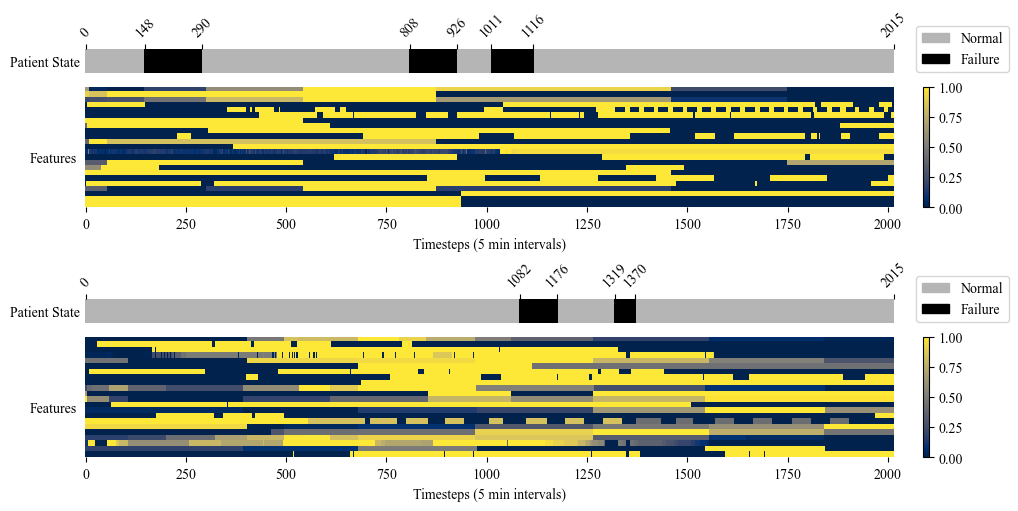

In [47]:
# Create the plot with subplots
fig, ax = plt.subplots(4, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [0.2,1,0.2,1]}, 
                       sharex=False,
                        layout='constrained'
                      )  # 1 row, 2 columns for subplots

# Subplot 1: Original heatmap
# im0 = ax[0].imshow(labels_shifted.T, cmap='binary', aspect='auto', interpolation='none')
im0 = ax[0].imshow(labels_shifted_1605.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted_1605)
# Bar plot adjusted to match the width of the plot below
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# ax[0].set_title("Circulatory Failure Example")
# ax[0].set_xlabel("Timesteps (5 min intervals)")
ax[0].set_ylabel("Patient State", rotation=0, 
                 # labelpad=30
                )
ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[0].legend(handles=legend_handles, loc='right', title="",
              # bbox_to_anchor=(1.15, 0.75),
              bbox_to_anchor=(1.15, 1.0),
              # ncol=len(legend_handles),
              ncol=1,             
              # fontsize=12,
              frameon=True,
             )
ax[0].set_xticks(xticks_1605)
ax[0].set_xticklabels(xticks_1605_labels, fontsize=10,rotation=45)  # Increase font size
ax[0].tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 

################################################################################################################
im2 = ax[2].imshow(labels_shifted_3737.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted_3737)
# Bar plot adjusted to match the width of the plot below
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# ax[0].set_title("Circulatory Failure Example")
# ax[0].set_xlabel("Timesteps (5 min intervals)")
ax[2].set_ylabel("Patient State", rotation=0, 
                 # labelpad=30
                )
ax[2].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[2].legend(handles=legend_handles, loc='right', title="",
              # bbox_to_anchor=(1.15, 0.75),
              bbox_to_anchor=(1.15, 1.0),
              # ncol=len(legend_handles),
              ncol=1,             
              # fontsize=12,
              frameon=True,
             )
ax[2].set_xticks(xticks_3737)
ax[2].set_xticklabels(xticks_3737_labels, fontsize=10, rotation=45)  # Increase font size
ax[2].tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False)

######################################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im1 = ax[1].imshow(data1605_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[1], 
             location = 'right',
             orientation='vertical',
             fraction=0.9,
             # aspect=2,
             pad=-0.1,
             # bbox_to_anchor=(0.1,0,1,1),
             # shrink=0.5,
             # anchor=(0, 0.5)
            )
# ax[1].set_title("Dataset")
ax[1].set_xlabel("Timesteps (5 min intervals)")
ax[1].set_ylabel("Features", rotation=0, 
                 # labelpad=25
                )
ax[1].yaxis.set_label_coords(-0.04, 0.35)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels

######################################################################################################################
im3 = ax[3].imshow(data3737_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im3, ax=ax[3], 
             location = 'right',
             orientation='vertical',
             fraction=0.9,
             # aspect=2,
             pad=-0.1,
             # bbox_to_anchor=(0.1,0,1,1),
             # shrink=0.5,
             # anchor=(0, 0.5)
            )
# ax[1].set_title("Dataset")
ax[3].set_xlabel("Timesteps (5 min intervals)")
ax[3].set_ylabel("Features", rotation=0, 
                 # labelpad=25
                )
ax[3].yaxis.set_label_coords(-0.04, 0.35)  # Adjust x and y positions
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_yticks([])  # Remove y-axis labels

# Add space between the subplots
# plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

# Add a title to the entire figure
# fig.suptitle("Circulatory Failure ICU Stay Example")
# fig.get_layout_engine().set(hspace=0.0, wspace=0)
# Show the plot
# plt.title("Circulatory Failure Example")
# plt.tight_layout(h_pad=1)
plt.show()
# plt.savefig('test_plot_o.png', bbox_inches='tight', dpi=600)

### now add plotter for each method

## Integrated Gradients

In [46]:
# attr_199 = torch.load('circ_crossformer/IG_andvariants/attr_IG_199.pt').numpy()
# attr_200 = torch.load('circ_crossformer/IG_andvariants/attr_IG_200.pt').numpy()
# attr_201 = torch.load('circ_crossformer/IG_andvariants/attr_IG_201.pt').numpy()

In [92]:
# attr_199_1605 = torch.load('attr_revision/attr_IG_199_causalcrossformer_pid1605.pt').numpy()
# attr_200_1605 = torch.load('attr_revision/attr_IG_200_causalcrossformer_pid1605.pt').numpy()
# attr_1099_3737 = torch.load('attr_revision/attr_IG_1099_causalcrossformer_pid3737.pt').numpy()
# attr_1100_3737 = torch.load('attr_revision/attr_IG_1100_causalcrossformer_pid3737.pt').numpy()

# GradientSHAP

In [47]:
# attr_199 = torch.load('circ_crossformer/Gshap/attr_GSHAP_199.pt').numpy()
# attr_200 = torch.load('circ_crossformer/Gshap/attr_GSHAP_200.pt').numpy()
# attr_201 = torch.load('circ_crossformer/Gshap/attr_GSHAP_201.pt').numpy()

In [97]:
# attr_199_1605 = torch.load('attr_revision/attr_GSHAP_199_causalcrossformer_pid1605.pt').numpy()
# attr_200_1605 = torch.load('attr_revision/attr_GSHAP_200_causalcrossformer_pid1605.pt').numpy()
# attr_1099_3737 = torch.load('attr_revision/attr_GSHAP_1099_causalcrossformer_pid3707.pt').numpy()
# attr_1100_3737 = torch.load('attr_revision/attr_GSHAP_1100_causalcrossformer_pid3707.pt').numpy()

## DeepLIFT - no baseline

In [175]:
# attr_199 = torch.load('circ_crossformer/DeepLift/attr_DeepLift_noBaseline_199.pt').detach().numpy()
# attr_200 = torch.load('circ_crossformer/DeepLift/attr_DeepLift_noBaseline_200.pt').detach().numpy()
# attr_201 = torch.load('circ_crossformer/DeepLift/attr_DeepLift_noBaseline_201.pt').detach().numpy()

## DeepLIFT w-baseline

In [197]:
# attr_199 = torch.load('circ_crossformer/DeepLift/attr_DeepLift_Baseline_199.pt').detach().numpy()
# attr_200 = torch.load('circ_crossformer/DeepLift/attr_DeepLift_Baseline_200.pt').detach().numpy()
# attr_201 = torch.load('circ_crossformer/DeepLift/attr_DeepLift_Baseline_201.pt').detach().numpy()

In [101]:
# attr_199_1605 = torch.load('attr_revision/attr_DeepLift_Baseline_199_causalcrossformer_pid1605.pt').numpy()
# attr_200_1605 = torch.load('attr_revision/attr_DeepLift_Baseline_200_causalcrossformer_pid1605.pt').numpy()
# attr_1099_3737 = torch.load('attr_revision/attr_DeepLift_Baseline_1099_causalcrossformer_pid3707.pt').numpy()
# attr_1100_3737 = torch.load('attr_revision/attr_DeepLift_Baseline_1100_causalcrossformer_pid3707.pt').numpy()

## DeepLIFTSHAP ##-- always requires a baseline

In [203]:
# attr_199 = torch.load('circ_crossformer/DeepLift/attr_DeepLiftSHAP_Baseline_199.pt').detach().numpy()
# attr_200 = torch.load('circ_crossformer/DeepLift/attr_DeepLiftSHAP_Baseline_200.pt').detach().numpy()
# attr_201 = torch.load('circ_crossformer/DeepLift/attr_DeepLiftSHAP_Baseline_201.pt').detach().numpy()

In [107]:
# attr_199_1605 = torch.load('attr_revision/attr_DeepLiftSHAP_Baseline_199_causalcrossformer_pid1605.pt').numpy()
# attr_200_1605 = torch.load('attr_revision/attr_DeepLiftSHAP_Baseline_200_causalcrossformer_pid1605.pt').numpy()
# attr_1099_3737 = torch.load('attr_revision/attr_DeepLiftSHAP_Baseline_1099_causalcrossformer_pid3707.pt').numpy()
# attr_1100_3737 = torch.load('attr_revision/attr_DeepLiftSHAP_Baseline_1100_causalcrossformer_pid3707.pt').numpy()

## Temporal IG

In [48]:
attr_TIG_1605 = torch.load('attr_revision/attr_TIG_C1_pid1605.pt').detach().numpy() ## we only get 2 outputs which are class specific
attr_TIG_3737 = torch.load('attr_revision/attr_TIG_C1_pid3737.pt').detach().numpy() ## we only get 2 outputs which are class specific

# Sequential IG

In [57]:
# attr_199 = torch.load('circ_crossformer/IG_andvariants/attr_SIG_199.pt').detach().numpy()
# attr_200 = torch.load('circ_crossformer/IG_andvariants/attr_SIG_200.pt').detach().numpy().squeeze()
# attr_201 = torch.load('circ_crossformer/IG_andvariants/attr_SIG_201.pt').detach().numpy().squeeze()

# FIT - tonekaboni

In [111]:
attr_FIT_1605 = torch.load('attr_revision/attr_FIT_1605.pt').cpu().detach().numpy()
attr_FIT_3737 = torch.load('attr_revision/attr_FIT_3737.pt').cpu().detach().numpy()

## Dynamask and Extremalmask

In [71]:
import pickle

In [87]:
attr_dyna_1605 = np.load('attr_revision/attr_dynamask_causal_crossformer_pid1605.npy').squeeze()
attr_dyna_3737 = np.load('attr_revision/attr_dynamask_causal_crossformer_pid3737.npy').squeeze()
attr_extr_1605 = torch.load('attr_revision/attr_extremalmask_causalcrossformer_epoch1000_pid1605.pt').cpu().detach().numpy().squeeze()
attr_extr_3737 = torch.load('attr_revision/attr_extremalmask_causalcrossformer_epoch1000_pid3737.pt').cpu().detach().numpy().squeeze()

## RETAIN

In [88]:
attr_retain_1605 = torch.load('attr_revision/attr_retain_1605.pt').cpu().detach().numpy()
attr_retain_3737 = torch.load('attr_revision/attr_retain_3737.pt').cpu().detach().numpy()

In [89]:
attr_TIG_1605.shape, attr_FIT_1605.shape, attr_dyna_1605.shape, attr_extr_1605.shape, attr_retain_1605.shape

((2016, 231), (2016, 231), (2016, 231), (2016, 231), (2016, 231))

In [90]:
attr_TIG_3737.shape, attr_FIT_3737.shape, attr_dyna_3737.shape, attr_extr_3737.shape, attr_retain_3737.shape

((2016, 231), (2016, 231), (2016, 231), (2016, 231), (2016, 231))

## Occlusion

In [71]:
# attr_199 = torch.load('circ_crossformer/Occlusion/attr_Occlusion_199.pt').detach().numpy()
# attr_200 = torch.load('circ_crossformer/Occlusion/attr_Occlusion_200.pt').detach().numpy()
# attr_201 = torch.load('circ_crossformer/Occlusion/attr_Occlusion_201.pt').detach().numpy()

## Augmented Occlusion

In [76]:
# attr_199 = torch.load('circ_crossformer/AugOcclusion/attr_AugOcclusion_199.pt').detach().numpy()
# attr_200 = torch.load('circ_crossformer/AugOcclusion/attr_AugOcclusion_200.pt').detach().numpy()
# attr_201 = torch.load('circ_crossformer/AugOcclusion/attr_AugOcclusion_201.pt').detach().numpy()

## FeatureAblation

In [82]:
# attr_199 = torch.load('circ_crossformer/FeatAblation/attr_FAb_199.pt').detach().numpy().squeeze()
# attr_200 = torch.load('circ_crossformer/FeatAblation/attr_FAb_200.pt').detach().numpy().squeeze()
# attr_201 = torch.load('circ_crossformer/FeatAblation/attr_FAb_201.pt').detach().numpy().squeeze()

## Feature Permutation

In [87]:
# attr_199 = torch.load('circ_crossformer/attr_Featperm_3times/attr_Featperm_199.pt').detach().numpy().squeeze()[0,:,:]
# attr_200 = torch.load('circ_crossformer/attr_Featperm_3times/attr_Featperm_200.pt').detach().numpy().squeeze()[0,:,:]
# attr_201 = torch.load('circ_crossformer/attr_Featperm_3times/attr_Featperm_201.pt').detach().numpy().squeeze()[0,:,:]

In [225]:
# # Calculate row-wise min and max
# attrrow_min = attr.min(axis=0, keepdims=True)
# attrrow_max = attr.max(axis=0, keepdims=True)

# attrcol_range = (attrrow_max - attrrow_min)

# # attrcol_range[attrcol_range == 0] = 0  # Set range to 1 for constant columns to avoid division by zero


# # Normalize each row to 0-1
# attr_np_rownorm = (attr - attrrow_min) / attrcol_range

In [139]:
# attr_199_1605_f  = attr_199_1605
# attr_200_1605_f  = attr_200_1605
# attr_1099_3737_f = attr_1099_3737
# attr_1100_3737_f = attr_1100_3737

In [105]:
# attr_f = attr_np_rownorm[:, non_flat_features.squeeze()]
# attr_199_1605_f = attr_199[:, non_flat_features_1605.squeeze()]
# attr_200_1605_f = attr_200[:, non_flat_features_1605.squeeze()]
# attr_201_f = attr_201[:, non_flat_features.squeeze()]

# attr_199_1605_f  = attr_199_1605[:, non_flat_features_1605.squeeze()]
# attr_200_1605_f  = attr_200_1605[:, non_flat_features_1605.squeeze()]
# attr_1099_3737_f = attr_1099_3737[:, non_flat_features_3737.squeeze()]
# attr_1100_3737_f = attr_1100_3737[:, non_flat_features_3737.squeeze()]

In [89]:
# workaround
# attr_1099_3737_f = np.zeros(attr_199_1605_f.shape)
# attr_1100_3737_f = np.zeros(attr_199_1605_f.shape)

In [112]:
attr_TIG_nf_1605 = attr_TIG_1605[:, non_flat_features_1605.squeeze()]
attr_FIT_nf_1605 = attr_FIT_1605[:, non_flat_features_1605.squeeze()]
attr_retain_nf_1605 = attr_retain_1605[:, non_flat_features_1605.squeeze()]
attr_dyna_nf_1605 = attr_dyna_1605[:, non_flat_features_1605.squeeze()]
attr_extr_nf_1605 = attr_extr_1605[:, non_flat_features_1605.squeeze()]

attr_TIG_nf_3737 = attr_TIG_3737[:, non_flat_features_3737.squeeze()]
attr_FIT_nf_3737 = attr_FIT_3737[:, non_flat_features_3737.squeeze()]
attr_retain_nf_3737 = attr_retain_3737[:, non_flat_features_3737.squeeze()]
attr_dyna_nf_3737 = attr_dyna_3737[:, non_flat_features_3737.squeeze()]
attr_extr_nf_3737 = attr_extr_3737[:, non_flat_features_3737.squeeze()]

In [143]:
# attr_dyna.shape, attr_extr.shape

In [144]:
# attr_dyna_nf = attr_dyna.squeeze()[:, non_flat_features.squeeze()]
# attr_extr_nf = attr_extr.squeeze()[:, non_flat_features.squeeze()]

In [145]:
# attr_retain_nf = attr_retain.squeeze()[:, non_flat_features.squeeze()]

In [146]:
# min_val = np.min(attr_f)
# max_val = np.max(attr_f)
# scaled_attr = (attr_f - min_val) / (max_val - min_val)


In [147]:
# method = 'GradSHAP'

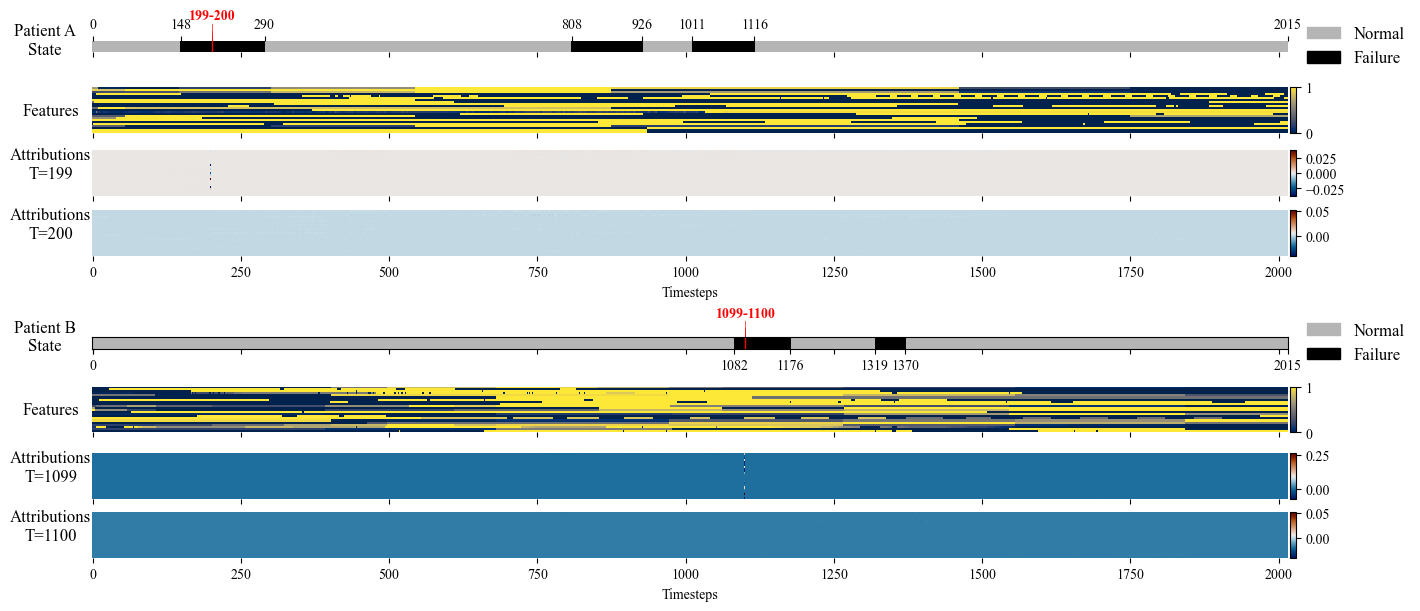

In [106]:
# Create the plot with subplots
fig, ax = plt.subplots(8, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [0.2,0.8,0.8,0.8,0.2,0.8,0.8,0.8]}, sharex=True,  layout='constrained')

########################################################################################################### 1605
im0 = ax[0].imshow(labels_shifted_1605.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted_1605)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[0].set_ylabel("Patient A\nState", rotation=0, fontsize=12)
ax[0].yaxis.set_label_coords(-0.04, -0.5)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# ax[0].set_xlim(150,300)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
ax[0].text(201, -2.1, '199-200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold')
ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax0_dup = ax[0].twiny()
ax0_dup.set_xlim(ax[0].get_xlim()) 
ax0_dup.set_xticks(xticks_1605)
ax0_dup.set_xticklabels(xticks_1605_labels, fontsize=10, rotation=0)  # Increase font size
ax0_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
#################################
ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im1 = ax[1].imshow(data1605_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[1], location = 'right', orientation='vertical',fraction=1.0, pad=-0.095,aspect=8)
ax[1].set_ylabel("Features", rotation=0, fontsize=12)
ax[1].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax0_dup.spines['top'].set_visible(False)
ax0_dup.spines['bottom'].set_visible(False)
ax0_dup.spines['left'].set_visible(False)
ax0_dup.spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im2 = ax[2].imshow(attr_199_1605_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im2, ax=ax[2], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
# ax[2].set_ylabel(f'{method} Attributions \n T=199', rotation=0)
ax[2].set_ylabel('Attributions\nT=199', rotation=0, fontsize=12)
ax[2].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
############################################################################################################
im3 = ax[3].imshow(attr_200_1605_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im3, ax=ax[3], location = 'right', orientation='vertical',fraction=1.0, pad=-0.095,aspect=8)
ax[3].set_xlabel("Timesteps")
# ax[3].set_ylabel(f'{method} Attributions \n T=200', rotation=0)
ax[3].set_ylabel('Attributions\nT=200', rotation=0, fontsize=12)
ax[3].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_yticks([])  # Remove y-axis labels
ax[3].tick_params(labelbottom=True)
############################################################################################################ 1605

########################################################################################################### 3737
im4 = ax[4].imshow(labels_shifted_3737.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted_3737)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[4].set_ylabel("Patient B\nState", rotation=0, fontsize=12)
ax[4].yaxis.set_label_coords(-0.04, -0.5)  # Adjust x and y positions
ax[4].spines['top'].set_visible(False)
ax[4].spines['bottom'].set_visible(False)
ax[4].spines['left'].set_visible(False)
ax[4].spines['right'].set_visible(False)
# ax[0].set_xlim(150,300)
ax[4].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[4].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
ax[4].text(1100, -2, '1099-1100',  ha='center', va='bottom', fontsize=10, color='red', weight='bold')
ax[4].text(1100, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
ax[4].text(1100, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
ax[4].text(1100, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax4_dup = ax[4].twiny()
ax4_dup.set_xlim(ax[4].get_xlim()) 
ax4_dup.set_xticks(xticks_3737)
ax4_dup.set_xticklabels(xticks_3737_labels, fontsize=10,rotation=0)  # Increase font size
ax4_dup.tick_params(axis='x', labeltop=False, labelbottom=True, top=False, bottom=True) 
#################################
ax[4].axvline(x=1100, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im5 = ax[5].imshow(data3737_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[5], location = 'right', orientation='vertical',fraction=1.0, pad=-0.095,aspect=8)
ax[5].set_ylabel("Features", rotation=0, fontsize=12)
ax[5].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[5].spines['top'].set_visible(False)
ax[5].spines['bottom'].set_visible(False)
ax[5].spines['left'].set_visible(False)
ax[5].spines['right'].set_visible(False)
ax0_dup.spines['top'].set_visible(False)
ax0_dup.spines['bottom'].set_visible(False)
ax0_dup.spines['left'].set_visible(False)
ax0_dup.spines['right'].set_visible(False)
ax[5].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im6 = ax[6].imshow(attr_1099_3737_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im6, ax=ax[6], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
# ax[2].set_ylabel(f'{method} Attributions \n T=199', rotation=0)
ax[6].set_ylabel('Attributions\nT=1099', rotation=0, fontsize=12)
ax[6].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[6].spines['top'].set_visible(False)
ax[6].spines['bottom'].set_visible(False)
ax[6].spines['left'].set_visible(False)
ax[6].spines['right'].set_visible(False)
ax[6].set_yticks([])  # Remove y-axis labels
############################################################################################################
im7 = ax[7].imshow(attr_1100_3737_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im3, ax=ax[7], location = 'right', orientation='vertical',fraction=1.0, pad=-0.095,aspect=8)
ax[7].set_xlabel("Timesteps")
# ax[3].set_ylabel(f'{method} Attributions \n T=200', rotation=0)
ax[7].set_ylabel('Attributions\nT=1100', rotation=0, fontsize=12)
ax[7].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[7].spines['top'].set_visible(False)
ax[7].spines['bottom'].set_visible(False)
ax[7].spines['left'].set_visible(False)
ax[7].spines['right'].set_visible(False)
ax[7].set_yticks([])  # Remove y-axis labels
############################################################################################################
############################################################################################################

# plt.show()
# plt.savefig('attr_revision/XAI_01_IG_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_02_GradSHAP_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_04_DeepLIFT_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_05_DeepLIFTSHAP_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_11_SIG_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_12_Occulusion_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_13_AugOcculusion_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_14_FeatAblation_Example_revision.png', bbox_inches='tight', dpi=400)
# plt.savefig('attr_revision/XAI_15_FeatPermutation_Example.png', bbox_inches='tight', dpi=400)

In [ ]:
# Create the plot with subplots
fig, ax = plt.subplots(8, 1, figsize=(14, 4.5), gridspec_kw={'height_ratios': [0.2,0.8,0.8,0.8,0.2,0.8,0.8,0.8,0.8]}, sharex=False,  layout='constrained')


im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[0].set_ylabel("Patient State", rotation=0, fontsize=12)
ax[0].yaxis.set_label_coords(-0.04, 0.15)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# ax[0].set_xlim(150,300)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
ax[0].text(201, -2.1, '200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold' )
ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax0_dup = ax[0].twiny()
ax0_dup.set_xlim(ax[0].get_xlim()) 
ax0_dup.set_xticks(xticks)
ax0_dup.set_xticklabels(xtick_labels, fontsize=10)  # Increase font size
ax0_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
#################################
ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[1], location = 'right', orientation='vertical',fraction=1.0, pad=-0.08)
ax[1].set_ylabel("Features", rotation=0, fontsize=12)
ax[1].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax0_dup.spines['top'].set_visible(False)
ax0_dup.spines['bottom'].set_visible(False)
ax0_dup.spines['left'].set_visible(False)
ax0_dup.spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im2 = ax[2].imshow(attr_199_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im2, ax=ax[2], location = 'right',orientation='vertical', fraction=1.0, pad=-0.08)
# ax[2].set_xlabel("Timesteps")
# ax[2].set_ylabel(f'{method} Attributions \n T=199', rotation=0)
ax[2].set_ylabel('Attributions\nT=199', rotation=0, fontsize=12)
ax[2].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
############################################################################################################
im3 = ax[3].imshow(attr_200_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im3, ax=ax[3], location = 'right', orientation='vertical',fraction=1.0, pad=-0.08)
# ax[3].set_xlabel("Timesteps")
# ax[3].set_ylabel(f'{method} Attributions \n T=200', rotation=0)
ax[3].set_ylabel('Attributions\nT=200', rotation=0, fontsize=12)
ax[3].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_yticks([])  # Remove y-axis labels
############################################################################################################
im4 = ax[4].imshow(attr_201_f.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im4, ax=ax[4], location = 'right', orientation='vertical',  fraction=1.0, pad=-0.08)
ax[4].set_xlabel("Timesteps", fontsize=14)
# ax[4].set_ylabel(f'{method}  Attributions \n T=201', rotation=0, fontsize=12)
ax[4].set_ylabel('Attributions\nT=201', rotation=0, fontsize=12)
ax[4].yaxis.set_label_coords(-0.035, 0.3)  # Adjust x and y positions
ax[4].spines['top'].set_visible(False)
ax[4].spines['bottom'].set_visible(False)
ax[4].spines['left'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].set_yticks([])  # Remove y-axis labels
############################################################################################################
# Add a title to the entire figure
# fig.suptitle("FIT Attributions at adjacent timesteps during patient organ failure")
# fig.get_layout_engine().set(hspace=0.0, wspace=0)
# Show the plot
# plt.title("Circulatory Failure Example")
# plt.tight_layout(h_pad=1)
plt.show()

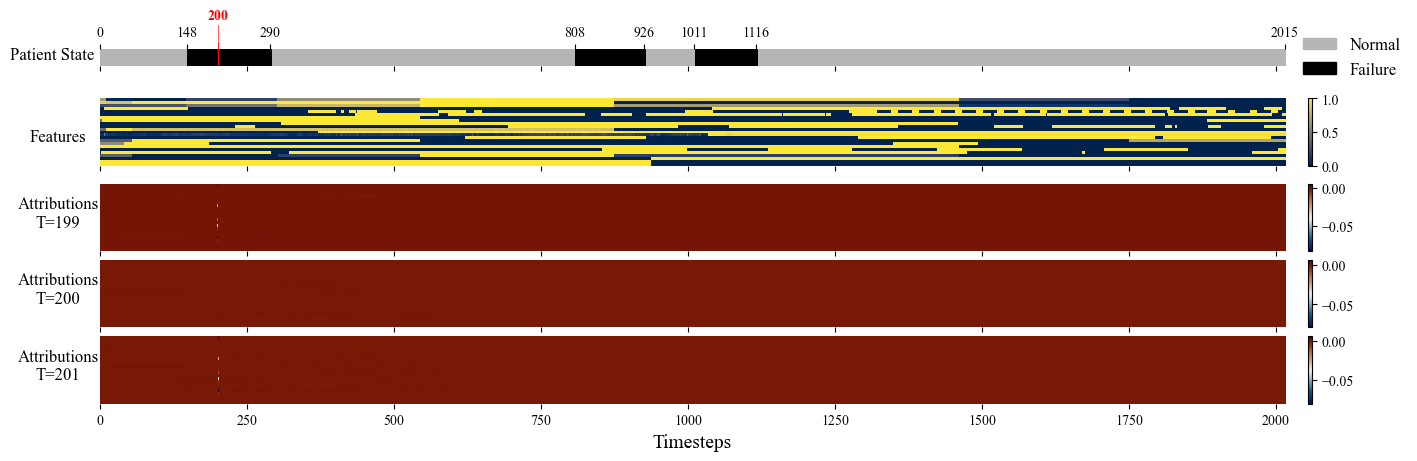

In [ ]:
# plt.savefig('icibnb_figures/XAI_01_IG_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_02_GradSHAP_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_03_DeepLIFT_noBaseline_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_04_DeepLIFT_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_05_DeepLIFTSHAP_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_11_SIG_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_12_Occulusion_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_13_AugOcculusion_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_14_FeatAblation_Example.png', bbox_inches='tight', dpi=400)
# plt.savefig('icibnb_figures/XAI_14_FeatPermutation_Example.png', bbox_inches='tight', dpi=400)

# retain

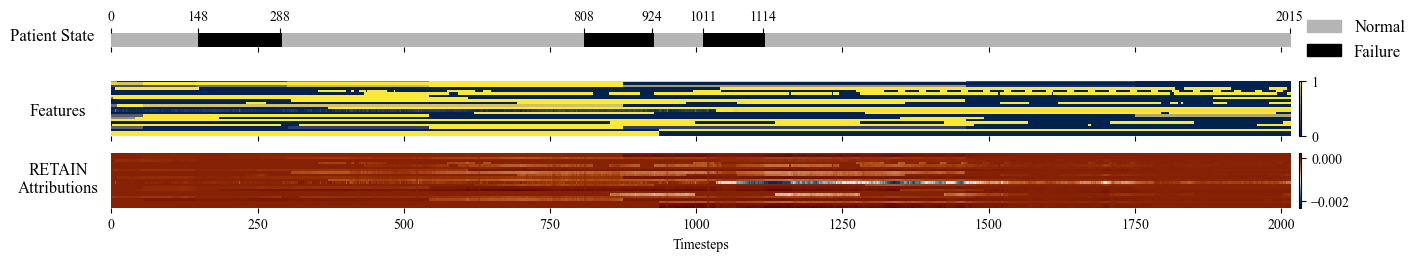

In [213]:
# Create the plot with subplots
fig, ax = plt.subplots(3, 1, figsize=(14, 2.5), gridspec_kw={'height_ratios': [0.2,0.8,0.8]}, sharex=True,  layout='constrained')
im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[0].set_ylabel("Patient State", rotation=0,fontsize=12)
ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')


# ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.15, 1.0),  ncol=1, frameon=True)
ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
# ax[0].text(201, -2.1, '200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold' )
# ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
# ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
# ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax0_dup = ax[0].twiny()
ax0_dup.set_xlim(ax[0].get_xlim()) 
ax0_dup.set_xticks(xticks)
ax0_dup.set_xticklabels(xtick_labels, fontsize=10)  # Increase font size
ax0_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
#################################
# ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[1], location = 'right', orientation='vertical',fraction=0.9, pad=-0.09)
ax[1].set_ylabel("Features", rotation=0,fontsize=12)
ax[1].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax0_dup.spines['top'].set_visible(False)
ax0_dup.spines['bottom'].set_visible(False)
ax0_dup.spines['left'].set_visible(False)
ax0_dup.spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im2 = ax[2].imshow(attr_retain_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im2, ax=ax[2], location = 'right',orientation='vertical', fraction=0.9, pad=-0.09)
ax[2].set_xlabel("Timesteps")
ax[2].set_ylabel(f'RETAIN\nAttributions', rotation=0,fontsize=12)
ax[2].yaxis.set_label_coords(-0.045, 0.2)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
#########################################################################################################
# plt.show()
plt.savefig('icibnb_figures/XAI_10_RETAIN_Example.png', bbox_inches='tight', dpi=400)

# single attr MAPS

In [51]:
# # Create the plot with subplots
# fig, ax = plt.subplots(6, 1, figsize=(14, 6.5), gridspec_kw={'height_ratios': [0.2,0.8,0.8,0.8,0.8,0.8]}, sharex=True,  layout='constrained')
# im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
# color_map = {0: '#b5b5b5', 1: '#000000'}
# colors = np.vectorize(color_map.get)(labels_shifted)
# legend_labels = {0: "Normal", 1: "Failure"}
# legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# ax[0].set_ylabel("Patient State", rotation=0,fontsize=12)
# ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
# ax[0].spines['left'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[0].set_yticks([])  # Remove y-axis labels
# # ax[0].axis('off')


# # ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.15, 1.0),  ncol=1, frameon=True)
# ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
# # ax[0].text(201, -2.1, '200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold' )
# # ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
# # ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
# # ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
# #################################
# ax0_dup = ax[0].twiny()
# ax0_dup.set_xlim(ax[0].get_xlim()) 
# ax0_dup.set_xticks(xticks)
# ax0_dup.set_xticklabels(xtick_labels, fontsize=10)  # Increase font size
# ax0_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
# #################################
# # ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
# #######################################################################################################
# # im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
# fig.colorbar(im1, ax=ax[1], location = 'right', orientation='vertical',fraction=0.9, pad=-0.09)
# ax[1].set_ylabel("Features", rotation=0,fontsize=12)
# ax[1].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)
# ax[1].spines['left'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# ax0_dup.spines['top'].set_visible(False)
# ax0_dup.spines['bottom'].set_visible(False)
# ax0_dup.spines['left'].set_visible(False)
# ax0_dup.spines['right'].set_visible(False)
# ax[1].set_yticks([])  # Remove y-axis labels
# ##########################################################################################################
# # im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# # im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
# im2 = ax[2].imshow(attr_TIG_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none')
# fig.colorbar(im2, ax=ax[2], location = 'right',orientation='vertical', fraction=0.9, pad=-0.09)
# # ax[2].set_xlabel("Timesteps")
# ax[2].set_ylabel(f'TIG\nAttributions', rotation=0,fontsize=12)
# ax[2].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
# ax[2].spines['top'].set_visible(False)
# ax[2].spines['bottom'].set_visible(False)
# ax[2].spines['left'].set_visible(False)
# ax[2].spines['right'].set_visible(False)
# ax[2].set_yticks([])  # Remove y-axis labels
# ############################################################################################################
# # im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# # im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
# im3 = ax[3].imshow(attr_FIT_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none')
# fig.colorbar(im3, ax=ax[3], location = 'right',orientation='vertical', fraction=0.9, pad=-0.09)
# # ax[2].set_xlabel("Timesteps")
# ax[3].set_ylabel(f'FIT\nAttributions', rotation=0,fontsize=12)
# ax[3].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
# ax[3].spines['top'].set_visible(False)
# ax[3].spines['bottom'].set_visible(False)
# ax[3].spines['left'].set_visible(False)
# ax[3].spines['right'].set_visible(False)
# ax[3].set_yticks([])  # Remove y-axis labels
# #########################################################################################################
# im4 = ax[4].imshow(attr_dyna_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none',vmax=1.0, vmin=0.0)
# fig.colorbar(im4, ax=ax[4], location = 'right',orientation='vertical', fraction=0.9, pad=-0.09)
# # ax[2].set_xlabel("Timesteps")
# ax[4].set_ylabel(f'DynaMask\nAttributions', rotation=0,fontsize=12)
# ax[4].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
# ax[4].spines['top'].set_visible(False)
# ax[4].spines['bottom'].set_visible(False)
# ax[4].spines['left'].set_visible(False)
# ax[4].spines['right'].set_visible(False)
# ax[4].set_yticks([])  # Remove y-axis labels
# ############################################################################################################
# # im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# # im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
# im5 = ax[5].imshow(attr_extr_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none',vmax=0.6, vmin=0.4)
# fig.colorbar(im5, ax=ax[5], location = 'right',orientation='vertical', fraction=0.9, pad=-0.09)
# ax[5].set_xlabel("Timesteps", fontsize=14)
# ax[5].set_ylabel(f'ExtremalMask\nAttributions', rotation=0,fontsize=12)
# ax[5].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
# ax[5].spines['top'].set_visible(False)
# ax[5].spines['bottom'].set_visible(False)
# ax[5].spines['left'].set_visible(False)
# ax[5].spines['right'].set_visible(False)
# ax[5].set_yticks([])  # Remove y-axis labels
# # Add a title to the entire figure
# # fig.suptitle("FIT Attributions at adjacent timesteps during patient organ failure")
# # fig.get_layout_engine().set(hspace=0.0, wspace=0)
# # Show the plot
# # plt.title("Circulatory Failure Example")
# # plt.tight_layout(h_pad=1)
# # plt.show()
# # plt.savefig('icibnb_figures/XAI_09_4together_Example.png', bbox_inches='tight', dpi=400)

## 5 together

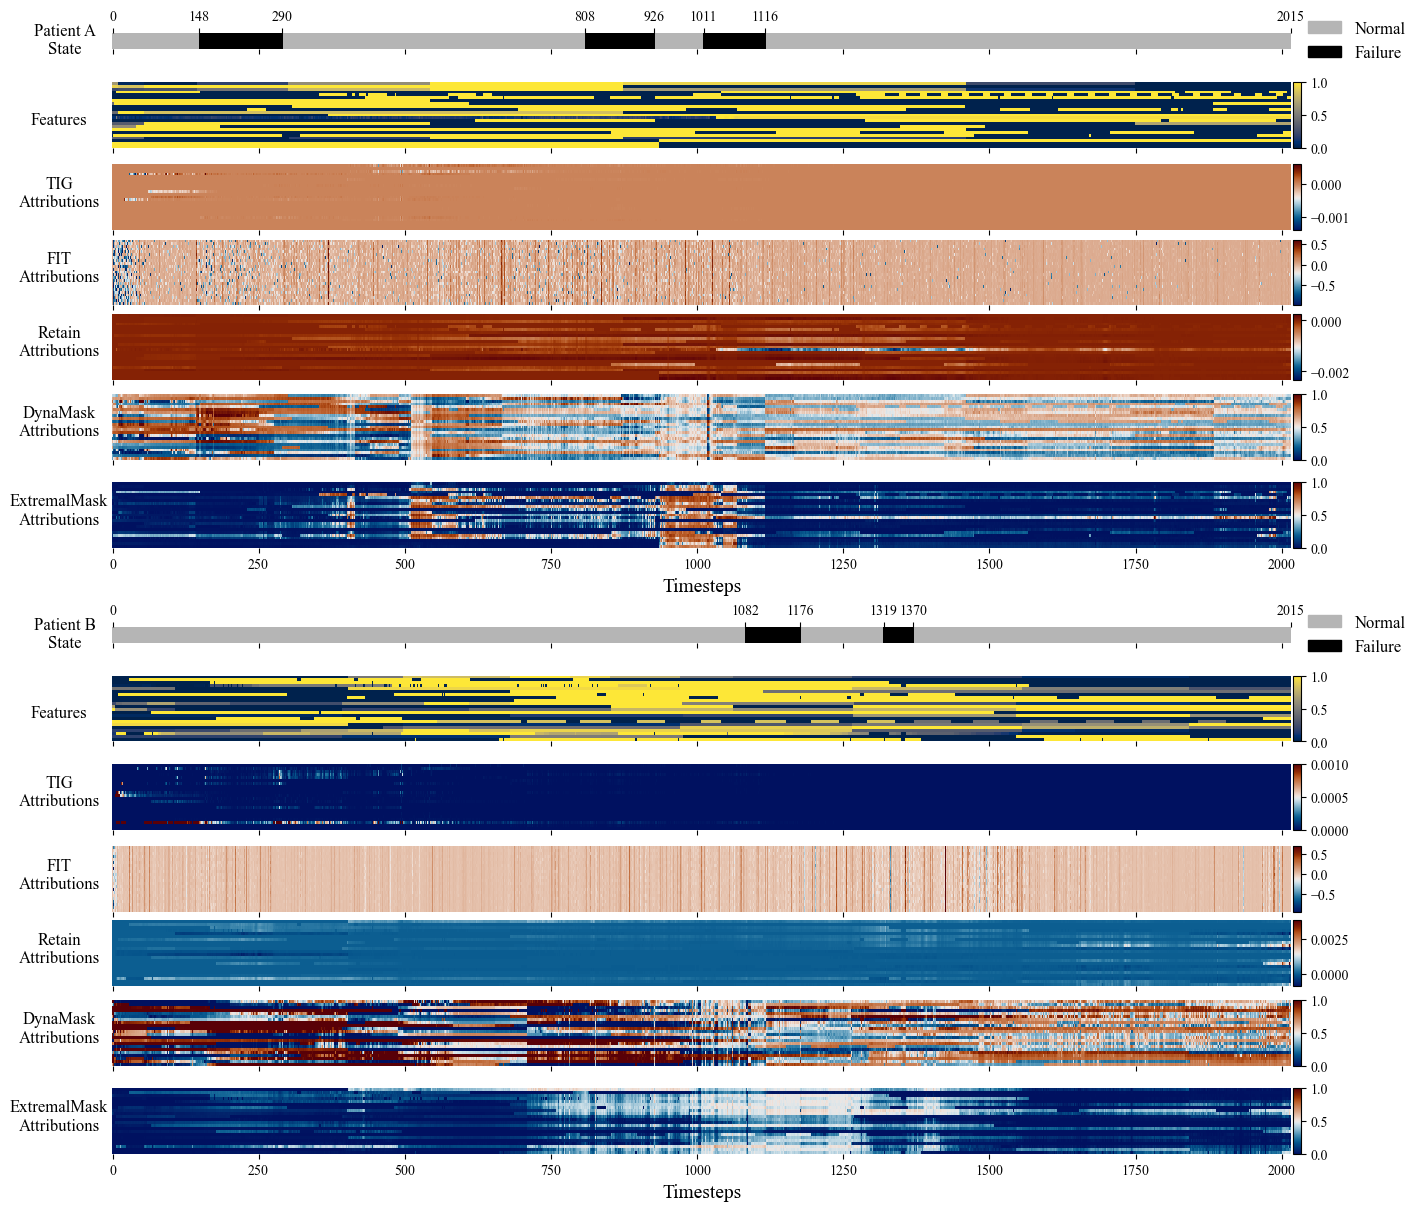

In [123]:
# Create the plot with subplots
fig, ax = plt.subplots(14, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [0.2,0.8,0.8,0.8,0.8,0.8,0.8,0.2,0.8,0.8,0.8,0.8,0.8,0.8]}, sharex=True,  layout='constrained')
im0 = ax[0].imshow(labels_shifted_1605.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted_1605)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[0].set_ylabel("Patient A\nState", rotation=0,fontsize=12)
ax[0].yaxis.set_label_coords(-0.04, -0.5)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
# ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.15, 1.0),  ncol=1, frameon=True)
ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
# ax[0].text(201, -2.1, '200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold' )
# ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
# ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
# ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax0_dup = ax[0].twiny()
ax0_dup.set_xlim(ax[0].get_xlim()) 
ax0_dup.set_xticks(xticks_1605)
ax0_dup.set_xticklabels(xticks_1605_labels, fontsize=10)  # Increase font size
ax0_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
#################################
# ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im1 = ax[1].imshow(data1605_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[1], location = 'right', orientation='vertical',fraction=1.0, pad=-0.095,aspect=8)
ax[1].set_ylabel("Features", rotation=0,fontsize=12)
ax[1].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax0_dup.spines['top'].set_visible(False)
ax0_dup.spines['bottom'].set_visible(False)
ax0_dup.spines['left'].set_visible(False)
ax0_dup.spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im2 = ax[2].imshow(attr_TIG_nf_1605.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im2, ax=ax[2], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[2].set_ylabel(f'TIG\nAttributions', rotation=0,fontsize=12)
ax[2].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
############################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im3 = ax[3].imshow(attr_FIT_nf_1605.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im3, ax=ax[3], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[3].set_ylabel(f'FIT\nAttributions', rotation=0,fontsize=12)
ax[3].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_yticks([])  # Remove y-axis labels
#########################################################################################################
im4 = ax[4].imshow(attr_retain_nf_1605.T, cmap=cmc.vik, aspect='auto', interpolation='none',
                   # vmax=1.0, vmin=0.0
                  )
fig.colorbar(im4, ax=ax[4], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[4].set_ylabel(f'Retain\nAttributions', rotation=0,fontsize=12)
ax[4].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[4].spines['top'].set_visible(False)
ax[4].spines['bottom'].set_visible(False)
ax[4].spines['left'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].set_yticks([])  # Remove y-axis labels
#########################################################################################################
im5 = ax[5].imshow(attr_dyna_nf_1605.T, cmap=cmc.vik, aspect='auto', interpolation='none',
                   # vmax=1.0, vmin=0.0
                  )
fig.colorbar(im5, ax=ax[5], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[5].set_ylabel(f'DynaMask\nAttributions', rotation=0,fontsize=12)
ax[5].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[5].spines['top'].set_visible(False)
ax[5].spines['bottom'].set_visible(False)
ax[5].spines['left'].set_visible(False)
ax[5].spines['right'].set_visible(False)
ax[5].set_yticks([])  # Remove y-axis labels
############################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im6 = ax[6].imshow(attr_extr_nf_1605.T, cmap=cmc.vik, aspect='auto', interpolation='none',
                   # vmax=0.9, vmin=0.1
                  )
fig.colorbar(im5, ax=ax[6], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
ax[6].set_xlabel("Timesteps", fontsize=14)
ax[6].set_ylabel(f'ExtremalMask\nAttributions', rotation=0,fontsize=12)
ax[6].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[6].spines['top'].set_visible(False)
ax[6].spines['bottom'].set_visible(False)
ax[6].spines['left'].set_visible(False)
ax[6].spines['right'].set_visible(False)
ax[6].set_yticks([])  # Remove y-axis labels
ax[6].tick_params(labelbottom=True)
################################################################################
im7 = ax[7].imshow(labels_shifted_3737.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted_3737)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[7].set_ylabel("Patient B\nState", rotation=0,fontsize=12)
ax[7].yaxis.set_label_coords(-0.04, -0.5)  # Adjust x and y positions
ax[7].spines['top'].set_visible(False)
ax[7].spines['bottom'].set_visible(False)
ax[7].spines['left'].set_visible(False)
ax[7].spines['right'].set_visible(False)
ax[7].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
# ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.15, 1.0),  ncol=1, frameon=True)
ax[7].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.11, 0.5),  ncol=1, frameon=False, fontsize=12)
# ax[0].text(201, -2.1, '200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold' )
# ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
# ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
# ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax7_dup = ax[7].twiny()
ax7_dup.set_xlim(ax[7].get_xlim()) 
ax7_dup.set_xticks(xticks_3737)
ax7_dup.set_xticklabels(xticks_3737_labels, fontsize=10)  # Increase font size
ax7_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
ax7_dup.spines['top'].set_visible(False)
ax7_dup.spines['bottom'].set_visible(False)
ax7_dup.spines['left'].set_visible(False)
ax7_dup.spines['right'].set_visible(False)
#################################
# ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im8 = ax[8].imshow(data3737_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im8, ax=ax[8], location = 'right', orientation='vertical',fraction=1.0, pad=-0.095,aspect=8)
ax[8].set_ylabel("Features", rotation=0,fontsize=12)
ax[8].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[8].spines['top'].set_visible(False)
ax[8].spines['bottom'].set_visible(False)
ax[8].spines['left'].set_visible(False)
ax[8].spines['right'].set_visible(False)
ax[8].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im9 = ax[9].imshow(attr_TIG_nf_3737.T, cmap=cmc.vik, aspect='auto', interpolation='none',vmax=0.001, vmin=0.0)
fig.colorbar(im9, ax=ax[9], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[9].set_ylabel(f'TIG\nAttributions', rotation=0,fontsize=12)
ax[9].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[9].spines['top'].set_visible(False)
ax[9].spines['bottom'].set_visible(False)
ax[9].spines['left'].set_visible(False)
ax[9].spines['right'].set_visible(False)
ax[9].set_yticks([])  # Remove y-axis labels
############################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im10 = ax[10].imshow(attr_FIT_nf_3737.T, cmap=cmc.vik, aspect='auto', interpolation='none')
fig.colorbar(im10, ax=ax[10], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[10].set_ylabel(f'FIT\nAttributions', rotation=0,fontsize=12)
ax[10].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[10].spines['top'].set_visible(False)
ax[10].spines['bottom'].set_visible(False)
ax[10].spines['left'].set_visible(False)
ax[10].spines['right'].set_visible(False)
ax[10].set_yticks([])  # Remove y-axis labels
#########################################################################################################
im11 = ax[11].imshow(attr_retain_nf_3737.T, cmap=cmc.vik, aspect='auto', interpolation='none',
                   # vmax=1.0, vmin=0.0
                  )
fig.colorbar(im11, ax=ax[11], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[11].set_ylabel(f'Retain\nAttributions', rotation=0,fontsize=12)
ax[11].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[11].spines['top'].set_visible(False)
ax[11].spines['bottom'].set_visible(False)
ax[11].spines['left'].set_visible(False)
ax[11].spines['right'].set_visible(False)
ax[11].set_yticks([])  # Remove y-axis labels
#########################################################################################################
im12 = ax[12].imshow(attr_dyna_nf_3737.T, cmap=cmc.vik, aspect='auto', interpolation='none',
                   vmax=1.0, vmin=0.0
                  )
fig.colorbar(im12, ax=ax[12], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
# ax[2].set_xlabel("Timesteps")
ax[12].set_ylabel(f'DynaMask\nAttributions', rotation=0,fontsize=12)
ax[12].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[12].spines['top'].set_visible(False)
ax[12].spines['bottom'].set_visible(False)
ax[12].spines['left'].set_visible(False)
ax[12].spines['right'].set_visible(False)
ax[12].set_yticks([])  # Remove y-axis labels
############################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im13 = ax[13].imshow(attr_extr_nf_3737.T, cmap=cmc.vik, aspect='auto', interpolation='none',
                   vmax=1.0, vmin=0.0
                  )
fig.colorbar(im13, ax=ax[13], location = 'right',orientation='vertical', fraction=1.0, pad=-0.095,aspect=8)
ax[13].set_xlabel("Timesteps", fontsize=14)
ax[13].set_ylabel(f'ExtremalMask\nAttributions', rotation=0,fontsize=12)
ax[13].yaxis.set_label_coords(-0.045, 0.3)  # Adjust x and y positions
ax[13].spines['top'].set_visible(False)
ax[13].spines['bottom'].set_visible(False)
ax[13].spines['left'].set_visible(False)
ax[13].spines['right'].set_visible(False)
ax[13].set_yticks([])  # Remove y-axis labels
# plt.show()
plt.savefig('attr_revision/XAI_09_5together_Example_revision.png', bbox_inches='tight', dpi=400)

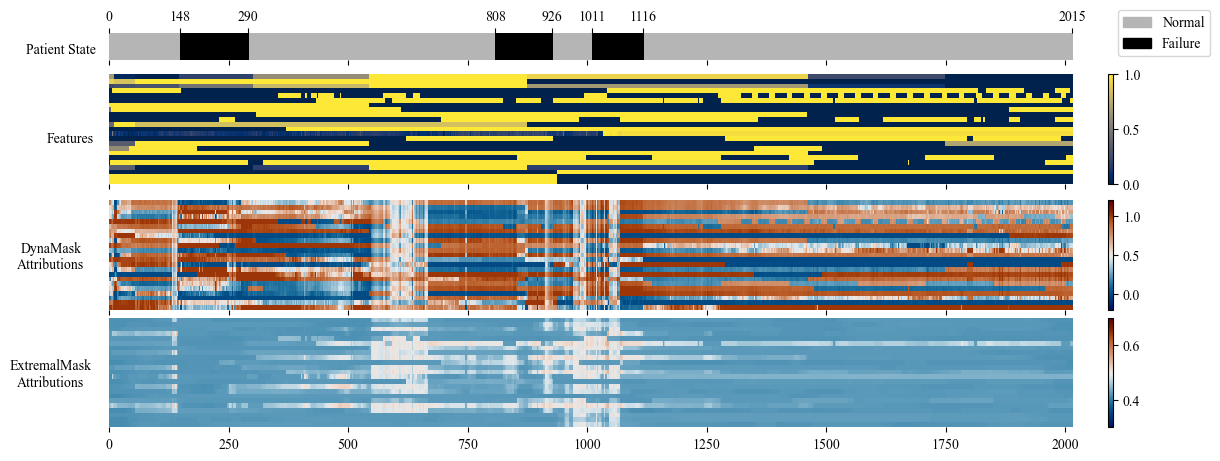

In [75]:
# Create the plot with subplots
fig, ax = plt.subplots(4, 1, figsize=(12, 4.5), gridspec_kw={'height_ratios': [0.2,0.8,0.8,0.8]}, sharex=True,  layout='constrained')
im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted)
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
ax[0].set_ylabel("Patient State", rotation=0)
ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')

ax[0].legend(handles=legend_handles, loc='right', title="", bbox_to_anchor=(1.15, 1.0),  ncol=1, frameon=True)
# ax[0].text(201, -2.1, '200',  ha='center', va='bottom', fontsize=10, color='red', weight='bold' )
# ax[0].text(201, 0, '|',  ha='center', va='bottom', fontsize=12, color='red' )
# ax[0].text(201, -1, '|',  ha='center', va='top', fontsize=12, color='red' )
# ax[0].text(201, -2, '|',  ha='center', va='top', fontsize=12, color='red' )
#################################
ax0_dup = ax[0].twiny()
ax0_dup.set_xlim(ax[0].get_xlim()) 
ax0_dup.set_xticks(xticks)
ax0_dup.set_xticklabels(xtick_labels, fontsize=10)  # Increase font size
ax0_dup.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
#################################
# ax[0].axvline(x=201, color='red', linestyle='solid', linewidth=1, zorder=10)
#######################################################################################################
# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im1, ax=ax[1], location = 'right', orientation='vertical',fraction=0.9, pad=-0.1)
ax[1].set_ylabel("Features", rotation=0)
ax[1].yaxis.set_label_coords(-0.04, 0.35)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax0_dup.spines['top'].set_visible(False)
ax0_dup.spines['bottom'].set_visible(False)
ax0_dup.spines['left'].set_visible(False)
ax0_dup.spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels
##########################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im2 = ax[2].imshow(attr_dyna_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none',vmax=1.2, vmin=-0.2)
fig.colorbar(im2, ax=ax[2], location = 'right',orientation='vertical', fraction=0.9, pad=-0.1)
# ax[2].set_xlabel("Timesteps")
ax[2].set_ylabel(f'DynaMask\nAttributions', rotation=0)
ax[2].yaxis.set_label_coords(-0.06, 0.35)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
############################################################################################################
# im2 = ax[2].imshow(attr_f.T, cmap=cmc.vik, aspect='auto', interpolation='none', vmax=1.0, vmin=0.0)
# im2 = ax[2].imshow(scaled_attr.T, cmap=cmc.vik, aspect='auto', interpolation='none')
im3 = ax[3].imshow(attr_extr_nf.T, cmap=cmc.vik, aspect='auto', interpolation='none',vmax=0.7, vmin=0.3)
fig.colorbar(im3, ax=ax[3], location = 'right',orientation='vertical', fraction=0.9, pad=-0.1)
# ax[2].set_xlabel("Timesteps")
ax[3].set_ylabel(f'ExtremalMask\nAttributions', rotation=0)
ax[3].yaxis.set_label_coords(-0.06, 0.35)  # Adjust x and y positions
ax[3].spines['top'].set_visible(False)
ax[3].spines['bottom'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_yticks([])  # Remove y-axis labels
# Add a title to the entire figure
# fig.suptitle("FIT Attributions at adjacent timesteps during patient organ failure")
# fig.get_layout_engine().set(hspace=0.0, wspace=0)
# Show the plot
# plt.title("Circulatory Failure Example")
# plt.tight_layout(h_pad=1)
# plt.show()
plt.savefig('icibnb_figures/XAI_08_D_E_Example.png', bbox_inches='tight', dpi=300)

## ignore below

In [291]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [292]:
from einops import rearrange, repeat
import math


class DSW_embedding(nn.Module):
    def __init__(self, seg_len, d_model):
        super(DSW_embedding, self).__init__()
        self.seg_len = seg_len
        self.d_model = d_model
        self.linear = nn.Linear(seg_len * 231, d_model)

    def forward(self, x):
        batch, ts_len, ts_dim = x.shape
        pad_len = (self.seg_len - (ts_len % self.seg_len)) % self.seg_len
        if pad_len != 0:
            x = torch.cat([x, torch.zeros(batch, pad_len, ts_dim).to(x.device)], dim=1)
        seg_num = (ts_len + pad_len) // self.seg_len
        x_segment = rearrange(x, 'b (seg_num seg_len) d -> b seg_num (seg_len d)', seg_len=self.seg_len)
        x_embed = self.linear(x_segment)
        # Reshape to (batch, seg_num * seg_len, d_model)
        x_embed = x_embed.unsqueeze(2).repeat(1, 1, self.seg_len, 1)
        x_embed = x_embed.view(batch, -1, self.d_model)
        return x_embed[:, :ts_len, :]  # Remove the padding

class SegMerging(nn.Module):
    def __init__(self, d_model, win_size, norm_layer=nn.LayerNorm):
        super().__init__()
        self.d_model = d_model
        self.win_size = win_size
        self.linear_trans = nn.Linear(d_model, d_model)
        self.norm = norm_layer(d_model)

    def forward(self, x):
        x = self.norm(x)
        x = self.linear_trans(x)
        return x

class AttentionLayer(nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super(AttentionLayer, self).__init__()
        self.n_heads = n_heads
        self.d_model = d_model
        self.d_k = d_model // n_heads

        self.qkv_proj = nn.Linear(d_model, 3 * d_model)
        self.o_proj = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, q, k, v):
        B, L, _ = q.size()
        qkv = self.qkv_proj(q).chunk(3, dim=-1)
        q, k, v = [rearrange(x, 'b l (h d) -> b h l d', h=self.n_heads) for x in qkv]

        scores = torch.einsum('bhld,bhmd->bhlm', q, k) / math.sqrt(self.d_k)
        attn = scores.softmax(dim=-1)
        attn = self.dropout(attn)

        context = torch.einsum('bhlm,bhmd->bhld', attn, v)
        context = rearrange(context, 'b h l d -> b l (h d)')
        output = self.o_proj(context)
        return output

class CrossEncoder(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, block_depth, dropout, factor, e_blocks, win_size):
        super().__init__()
        self.time_attention = AttentionLayer(d_model, n_heads, dropout)
        self.dim_sender = AttentionLayer(d_model, n_heads, dropout)
        self.dim_receiver = AttentionLayer(d_model, n_heads, dropout)
        self.router = nn.Parameter(torch.randn(e_blocks, factor, d_model))
        
        self.dropout = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.norm4 = nn.LayerNorm(d_model)
        
        self.MLP1 = nn.Sequential(nn.Linear(d_model, d_ff),
                                  nn.GELU(),
                                  nn.Linear(d_ff, d_model))
        self.MLP2 = nn.Sequential(nn.Linear(d_model, d_ff),
                                  nn.GELU(),
                                  nn.Linear(d_ff, d_model))

    def forward(self, x):
        batch, seq_len, d_model = x.shape
        time_enc = self.time_attention(x, x, x)
        dim_in = x + self.dropout(time_enc)
        dim_in = self.norm1(dim_in)
        dim_in = dim_in + self.dropout(self.MLP1(dim_in))
        dim_in = self.norm2(dim_in)

        dim_send = dim_in
        batch_router = repeat(self.router, 'e_blocks factor d_model -> (repeat e_blocks) factor d_model', repeat=batch)
        dim_buffer = self.dim_sender(batch_router, dim_send, dim_send)
        dim_receive = self.dim_receiver(dim_send, dim_buffer, dim_buffer)
        dim_enc = dim_send + self.dropout(dim_receive)
        dim_enc = self.norm3(dim_enc)
        dim_enc = dim_enc + self.dropout(self.MLP2(dim_enc))
        dim_enc = self.norm4(dim_enc)

        return dim_enc

class EncoderOnlyCrossFormer(nn.Module):
    def __init__(self, seg_len, d_model, num_classes, num_layers, win_size, n_heads, d_ff, e_blocks, dropout=0.1):
        super(EncoderOnlyCrossFormer, self).__init__()
        
        # Embedding layer
        self.embedding = DSW_embedding(seg_len, d_model)
        
        # Encoder layers
        self.encoders = nn.ModuleList([
            CrossEncoder(d_model=d_model, n_heads=n_heads, d_ff=d_ff, block_depth=1, dropout=dropout, factor=5, e_blocks=e_blocks, win_size=win_size) for _ in range(num_layers)
        ])
        
        # Segment merging layer
        self.seg_merge = SegMerging(d_model, win_size)
        
        # Classification head
        self.logit = nn.Linear(d_model, num_classes)
        self.classifier = nn.Sequential(
            nn.LayerNorm(d_model),
            self.logit
        )
        
    def forward(self, x):
        # Apply embedding
        x_embed = self.embedding(x)
        
        # Pass through each encoder layer
        for encoder in self.encoders:
            x_embed = encoder(x_embed)
        
        # Merge segments
        x_merged = self.seg_merge(x_embed)
        
        # Classification head
        logits = self.classifier(x_merged)
        
        return logits

In [293]:
model_1 = EncoderOnlyCrossFormer(seg_len=1, d_model=36, num_classes=2, num_layers=1, win_size=1, n_heads=2, d_ff=16, e_blocks=1)

In [294]:
model_path_1 = 'circ_crossformer/testing_Crossformer_Circ_seed_0/model_epoch_40.pth' #model 1

In [295]:
temp_model = torch.load(model_path_1)
# Extract the model state dictionary
model_state_dict = temp_model['model_state_dict']

In [296]:
# Load the state dictionary into the model
model_1.load_state_dict(model_state_dict)

<All keys matched successfully>

In [297]:
model1 = model_1.cuda()

In [298]:
from scipy.special import softmax

In [299]:
tmp0_tensor = torch.tensor(data0).cuda()

In [300]:
y_pred = softmax(model_1(tmp0_tensor).cpu().detach().numpy().squeeze(), axis=1)[:,1]

In [319]:
y_pred_l = (y_pred >= 0.2).astype(int)

In [320]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    matthews_corrcoef,
    roc_auc_score,
    precision_recall_curve,
    auc
)

def calculate_metrics(y_true, y_pred, y_prob=None):
    """
    Calculate various classification metrics.
    
    Parameters:
        y_true (array-like): True binary labels.
        y_pred (array-like): Predicted binary labels.
        y_prob (array-like, optional): Predicted probabilities for the positive class.
        
    Returns:
        dict: A dictionary containing all metrics.
    """
    metrics = {}
    
    # Basic metrics
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision'] = precision_score(y_true, y_pred, zero_division=0)
    metrics['recall'] = recall_score(y_true, y_pred, zero_division=0)
    metrics['f1_score'] = f1_score(y_true, y_pred, zero_division=0)
    metrics['matthews_corrcoef'] = matthews_corrcoef(y_true, y_pred)
    metrics['classification_report'] = classification_report(y_true, y_pred, zero_division=0)
    
    # ROC AUC and PR AUC if probabilities are provided
    if y_prob is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_prob)
        precision, recall, _ = precision_recall_curve(y_true, y_prob)
        metrics['pr_auc'] = auc(recall, precision)
    
    return metrics

In [321]:
# Calculate metrics
metrics = calculate_metrics(labels_binary, y_pred_l, y_pred)

# Print metrics
for key, value in metrics.items():
    print(f"{key}:")
    print(value)
    print()

accuracy:
0.5391865079365079

precision:
0.25229357798165136

recall:
0.4426559356136821

f1_score:
0.32140248356464574

matthews_corrcoef:
0.011679876908778248

classification_report:
              precision    recall  f1-score   support

         0.0       0.76      0.57      0.65      1519
         1.0       0.25      0.44      0.32       497

    accuracy                           0.54      2016
   macro avg       0.51      0.51      0.49      2016
weighted avg       0.63      0.54      0.57      2016


roc_auc:
0.5285763296036919

pr_auc:
0.2361829682496865



In [322]:
pred_shifted = np.zeros_like(y_pred_l)

# Perform the forward shift
pred_shifted[shift_steps:] = y_pred_l[:-shift_steps]

In [323]:
pred_shifted = pred_shifted.reshape(-1,1)

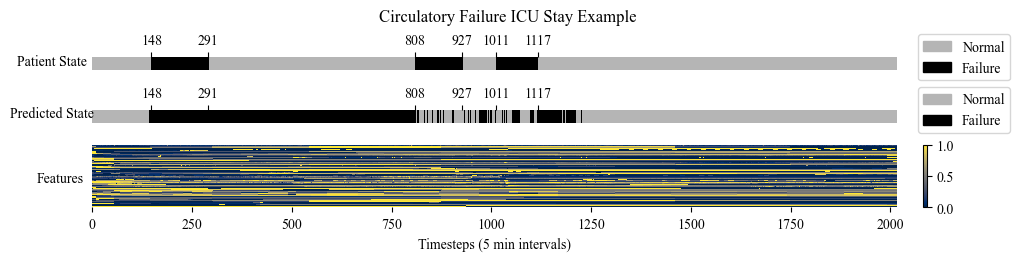

In [324]:
# Create the plot with subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 2.5), gridspec_kw={'height_ratios': [0.2,0.2,1]}, 
                       sharex=False,
                        layout='constrained'
                      )  # 1 row, 2 columns for subplots

# Subplot 1: Original heatmap
# im0 = ax[0].imshow(labels_shifted.T, cmap='binary', aspect='auto', interpolation='none')
im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted)
# Bar plot adjusted to match the width of the plot below
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# ax[0].set_title("Circulatory Failure Example")
# ax[0].set_xlabel("Timesteps (5 min intervals)")
ax[0].set_ylabel("Patient State", rotation=0, 
                 # labelpad=30
                )
ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[0].legend(handles=legend_handles, loc='right', title="",
              # bbox_to_anchor=(1.15, 0.75),
              bbox_to_anchor=(1.15, 1.0),
              # ncol=len(legend_handles),
              ncol=1,             
              # fontsize=12,
              frameon=True,
             )
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xtick_labels, fontsize=10)  # Increase font size
ax[0].tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 

###############################################################################################
im1 = ax[1].imshow(pred_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
color_map = {0: '#b5b5b5', 1: '#000000'}
colors = np.vectorize(color_map.get)(labels_shifted)
# Bar plot adjusted to match the width of the plot below
legend_labels = {0: "Normal", 1: "Failure"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# ax[0].set_title("Circulatory Failure Example")
# ax[0].set_xlabel("Timesteps (5 min intervals)")
ax[1].set_ylabel("Predicted State", rotation=0, 
                 # labelpad=30
                )
ax[1].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_yticks([])  # Remove y-axis labels
# ax[0].axis('off')
ax[1].legend(handles=legend_handles, loc='right', title="",
              # bbox_to_anchor=(1.15, 0.75),
              bbox_to_anchor=(1.15, 1.0),
              # ncol=len(legend_handles),
              ncol=1,             
              # fontsize=12,
              frameon=True,
             )
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xtick_labels, fontsize=10)  # Increase font size
ax[1].tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False) 
#################################################################################################


# im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
im2 = ax[2].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
fig.colorbar(im2, ax=ax[2], 
             location = 'right',
             orientation='vertical',
             fraction=0.9,
             # aspect=2,
             pad=-0.1,
             # bbox_to_anchor=(0.1,0,1,1),
             # shrink=0.5,
             # anchor=(0, 0.5)
            )
# ax[1].set_title("Dataset")
ax[2].set_xlabel("Timesteps (5 min intervals)")
ax[2].set_ylabel("Features", rotation=0, 
                 # labelpad=25
                )
ax[2].yaxis.set_label_coords(-0.04, 0.35)  # Adjust x and y positions
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_yticks([])  # Remove y-axis labels
# Add space between the subplots
# plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

# Add a title to the entire figure
fig.suptitle("Circulatory Failure ICU Stay Example")
# fig.get_layout_engine().set(hspace=0.0, wspace=0)
# Show the plot
# plt.title("Circulatory Failure Example")
# plt.tight_layout(h_pad=1)
plt.show()

In [141]:
# import cmcrameri.cm as cmc

In [60]:
# colormaps = {
#     'viridis': 'viridis',
#     'plasma': 'plasma',
#     'cividis': 'cividis',
#     'inferno': 'inferno',
#     'magma': 'magma',
#     'berlin': cmc.berlin,  # Use cmc.berlin for the colormap object
#     'broc': cmc.broc,
#     'cork': cmc.cork,
#     'vik': cmc.vik,
#     'lisbon': cmc.lisbon,
#     'tofino': cmc.tofino,
#     'roma': cmc.roma,
#     'bam': cmc.bam,
#     'vanimo': cmc.vanimo,
#     'managua': cmc.managua,
#     # Adding Sequential colormaps
#     'batlow': cmc.batlow,
#     'batlowW': cmc.batlowW,
#     'batlowK': cmc.batlowK,
#     'devon': cmc.devon,
#     'lajolla': cmc.lajolla,
#     'bamako': cmc.bamako,
#     'davos': cmc.davos,
#     'bilbao': cmc.bilbao,
#     'nuuk': cmc.nuuk,
#     'oslo': cmc.oslo,
#     'grayC': cmc.grayC,
#     'hawaii': cmc.hawaii,
#     'lapaz': cmc.lapaz,
#     'tokyo': cmc.tokyo,
#     'buda': cmc.buda,
#     'acton': cmc.acton,
#     'turku': cmc.turku,
#     'imola': cmc.imola,
#     'glasgow': cmc.glasgow,
#     'lipari': cmc.lipari,
#     'navia': cmc.navia
# }


In [61]:
# for cmap_name, cmap_obj in colormaps.items():
#     # Create the plot with subplots
#     fig, ax = plt.subplots(2, 1, figsize=(10, 4), gridspec_kw={'height_ratios': [0.2,1]}, 
#                            sharex=True,
#                             layout='constrained'
#                           )  # 1 row, 2 columns for subplots
    
#     # Subplot 1: Original heatmap
#     # im0 = ax[0].imshow(labels_shifted.T, cmap='binary', aspect='auto', interpolation='none')
#     im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
#     # fig.colorbar(im0, ax=ax[0], 
#     #              location = 'right',
#     #              orientation='vertical',
#     #              # fraction=0.9,
#     #              # aspect=2,
#     #              pad=0.01,
#     #              # bbox_to_anchor=(0.1,0,1,1),
#     #              # shrink=0.5,
#     #              # anchor=(0.5, 0.5)
#     #             )
    
#     color_map = {0: '#b5b5b5', 1: '#000000'}
#     colors = np.vectorize(color_map.get)(labels_shifted)
#     # Bar plot adjusted to match the width of the plot below
#     legend_labels = {0: "Normal", 1: "Failure"}
#     legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
#     # ax[0].set_title("Circulatory Failure Example")
#     # ax[0].set_xlabel("Timesteps (5 min intervals)")
#     ax[0].set_ylabel("Patient State", rotation=0, 
#                      # labelpad=30
#                     )
#     ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
#     ax[0].spines['top'].set_visible(False)
#     ax[0].spines['bottom'].set_visible(False)
#     ax[0].spines['left'].set_visible(False)
#     ax[0].spines['right'].set_visible(False)
#     ax[0].set_yticks([])  # Remove y-axis labels
#     # ax[0].axis('off')
#     ax[0].legend(handles=legend_handles, loc='right', title="",
#                   # bbox_to_anchor=(1.15, 0.75),
#                   bbox_to_anchor=(1.15, 1.0),
#                   # ncol=len(legend_handles),
#                   ncol=1,             
#                   # fontsize=12,
#                   frameon=True,
#                  )
    
#     # Subplot 2: Binary heatmap of labels
#     # im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
#     im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap=cmap_obj, aspect='auto', interpolation='none')
#     fig.colorbar(im1, ax=ax[1], 
#                  location = 'right',
#                  orientation='vertical',
#                  fraction=0.9,
#                  # aspect=2,
#                  pad=-0.1,
#                  # bbox_to_anchor=(0.1,0,1,1),
#                  # shrink=0.5,
#                  # anchor=(0, 0.5)
#                 )
#     # ax[1].set_title("Dataset")
#     ax[1].set_xlabel("Timesteps (5 min intervals)")
#     ax[1].set_ylabel("Features", rotation=0, 
#                      # labelpad=25
#                     )
#     ax[1].yaxis.set_label_coords(-0.04, 0.35)  # Adjust x and y positions
#     ax[1].spines['top'].set_visible(False)
#     ax[1].spines['bottom'].set_visible(False)
#     ax[1].spines['left'].set_visible(False)
#     ax[1].spines['right'].set_visible(False)
#     ax[1].set_yticks([])  # Remove y-axis labels
#     # Add space between the subplots
#     # plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
    
#     # Add a title to the entire figure
#     fig.suptitle(f'Circulatory Failure ICU Stay Example and cmap {cmap_name}')
#     # fig.get_layout_engine().set(hspace=0.0, wspace=0)
#     # Show the plot
#     # plt.title("Circulatory Failure Example")
#     # plt.tight_layout(h_pad=1)
#     plt.show()
#     plt.close()

In [15]:
# for index in valid_labels_indices:
#     print(index)
#     data0 = data_tensor=big_tensor[index:index+1]
#     label0= label_tensor[index:index+1]
#     data0_np = data0.squeeze()
#     label0_np= label0.numpy().squeeze()
#     row_min = data0_np.min(axis=0, keepdims=True)
#     row_max = data0_np.max(axis=0, keepdims=True)
#     col_range = (row_max - row_min)
#     col_range[col_range == 0] = 1  # Set range to 1 for constant columns to avoid division by zero
#     # Normalize each row to 0-1
#     data0_np_rownorm = (data0_np - row_min) / col_range
#     label0_np_flat = label0_np.reshape(-1,1)
#     labels_binary = np.where(label0_np_flat == -1, 0, label0_np_flat)
#     shift_steps = 144  # (12 * 60) / 5 for 5-minute intervals
#     labels_shifted = np.zeros_like(labels_binary)
#     # Perform the forward shift
#     labels_shifted[shift_steps:] = labels_binary[:-shift_steps]
#     non_flat_features = np.var(data0_np_rownorm, axis=0) > 0.002  # Compute variance along the time axis
#     data0_np_rownorm_filter = data0_np_rownorm[:, non_flat_features.squeeze()]  # Filter non-flat features
#     # Define the colormap using matplotlib's ListedColormap
#     custom_cmap = ListedColormap(['#b5b5b5', '#000000']) 
    
#     # Create the plot with subplots
#     fig, ax = plt.subplots(2, 1, figsize=(10, 2.2), gridspec_kw={'height_ratios': [0.2,1]}, 
#                            sharex=True,
#                             layout='constrained'
#                           )  # 1 row, 2 columns for subplots
    
#     # Subplot 1: Original heatmap
#     # im0 = ax[0].imshow(labels_shifted.T, cmap='binary', aspect='auto', interpolation='none')
#     im0 = ax[0].imshow(labels_shifted.T, cmap=custom_cmap, aspect='auto', interpolation='none')
#     # fig.colorbar(im0, ax=ax[0], 
#     #              location = 'right',
#     #              orientation='vertical',
#     #              # fraction=0.9,
#     #              # aspect=2,
#     #              pad=0.01,
#     #              # bbox_to_anchor=(0.1,0,1,1),
#     #              # shrink=0.5,
#     #              # anchor=(0.5, 0.5)
#     #             )
    
#     color_map = {0: '#b5b5b5', 1: '#000000'}
#     colors = np.vectorize(color_map.get)(labels_shifted)
#     # Bar plot adjusted to match the width of the plot below
#     legend_labels = {0: "Normal", 1: "Failure"}
#     legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
#     # ax[0].set_title("Circulatory Failure Example")
#     # ax[0].set_xlabel("Timesteps (5 min intervals)")
#     ax[0].set_ylabel("Patient State", rotation=0, 
#                      # labelpad=30
#                     )
#     ax[0].yaxis.set_label_coords(-0.05, 0.15)  # Adjust x and y positions
#     ax[0].spines['top'].set_visible(False)
#     ax[0].spines['bottom'].set_visible(False)
#     ax[0].spines['left'].set_visible(False)
#     ax[0].spines['right'].set_visible(False)
#     ax[0].set_yticks([])  # Remove y-axis labels
#     # ax[0].axis('off')
#     ax[0].legend(handles=legend_handles, loc='right', title="",
#                   # bbox_to_anchor=(1.15, 0.75),
#                   bbox_to_anchor=(1.15, 1.0),
#                   # ncol=len(legend_handles),
#                   ncol=1,             
#                   # fontsize=12,
#                   frameon=True,
#                  )
    
#     # Subplot 2: Binary heatmap of labels
#     im1 = ax[1].imshow(data0_np_rownorm_filter.T, cmap='cividis', aspect='auto', interpolation='none')
#     fig.colorbar(im1, ax=ax[1], 
#                  location = 'right',
#                  orientation='vertical',
#                  fraction=0.9,
#                  # aspect=2,
#                  pad=-0.1,
#                  # bbox_to_anchor=(0.1,0,1,1),
#                  # shrink=0.5,
#                  # anchor=(0, 0.5)
#                 )
#     # ax[1].set_title("Dataset")
#     ax[1].set_xlabel("Timesteps (5 min intervals)")
#     ax[1].set_ylabel("Features", rotation=0, 
#                      # labelpad=25
#                     )
#     ax[1].yaxis.set_label_coords(-0.04, 0.35)  # Adjust x and y positions
#     ax[1].spines['top'].set_visible(False)
#     ax[1].spines['bottom'].set_visible(False)
#     ax[1].spines['left'].set_visible(False)
#     ax[1].spines['right'].set_visible(False)
#     ax[1].set_yticks([])  # Remove y-axis labels
#     # Add space between the subplots
#     # plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
    
#     # Add a title to the entire figure
#     fig.suptitle("Circulatory Failure ICU Stay Example")
#     # fig.get_layout_engine().set(hspace=0.0, wspace=0)
#     # Show the plot
#     # plt.title("Circulatory Failure Example")
#     # plt.tight_layout(h_pad=1)
#     # plt.show()
#     # plt.savefig(f'icibnb_circ_plotter')
#     plt.savefig(f'icibnb_circ_plotter/icibnb_circ_index_{index}.png', bbox_inches='tight', dpi=300)

#     # Clear the current figure (optional, if you want to avoid overlap in the next iteration)
#     plt.close()